# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Wage

**Read the Lonniveau data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [102]:
# a. load
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [103]:
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Remove all rows which are not municipalities**:

In [104]:
wage = dataproject.only_keep_municipalities(wage)
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [105]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2019)}
wage.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage, stubnames='wage', i='municipality', j='year').reset_index()

# c. show
wage_long.head()

,municipality,year,wage
0,Hele landet,2009,35734
1,København,2009,36607
2,Frederiksberg,2009,41119
3,Dragør,2009,43215
4,Tårnby,2009,36147


## Gini

In [106]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

In [91]:
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


In [107]:
gini = dataproject.only_keep_municipalities(gini)
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


**Convert the dataset to long format**:

In [110]:
# a. rename year columns
mydict1 = {str(k):f'gini{k}' for k in range(2009,2020)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,gini
0,Hele landet,2009,26.74
1,København,2009,29.38
2,Frederiksberg,2009,30.33
3,Dragør,2009,26.25
4,Tårnby,2009,21.40


## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [111]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gini
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

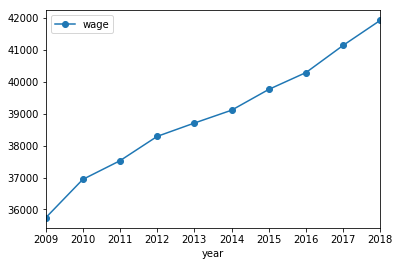

In [112]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. This means removing Christiansø from our datasets, so they represent the same municpalities and all of Denmark.

In [113]:
print(len(gini_long.year.unique()))
print(len(wage_long.year.unique()))
print(len(gini_long.municipality.unique()))
print(len(wage_long.municipality.unique()))

#We merge the two datasets:
merged = pd.merge(gini_long, wage_long ,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged2.municipality.unique())}')
print(f'Number of years          = {len(merged2.year.unique())}')

10
10
99
99
Number of municipalities = 99
Number of years          = 10


# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [124]:
print(merged.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long)
print(wage_long)
print(merged.groupby('year').agg(['mean']))

gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88
       gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88
        municipality  year   gini
0        Hele landet  2009  26.74
1          København  2009  29.38
2      Frederiksberg  2009  30.33
3             Dragør  2009  26.25
4    

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.